In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans

c:\users\mitesh manoj adake\appdata\local\programs\python\python38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\users\mitesh manoj adake\appdata\local\programs\python\python38\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
c:\users\mitesh manoj adake\appdata\local\programs\python\python38\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
data = pd.read_csv("D:/Sem - 7 Lab/LP-3/ML/5/sales_data_sample.csv", encoding='unicode_escape')
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [3]:
df = data.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [5]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
df.dtypes

ORDERNUMBER                  int64
QUANTITYORDERED              int64
PRICEEACH                  float64
ORDERLINENUMBER              int64
SALES                      float64
ORDERDATE           datetime64[ns]
STATUS                      object
QTR_ID                       int64
MONTH_ID                     int64
YEAR_ID                      int64
PRODUCTLINE                 object
MSRP                         int64
PRODUCTCODE                 object
CUSTOMERNAME                object
PHONE                       object
ADDRESSLINE1                object
ADDRESSLINE2                object
CITY                        object
STATE                       object
POSTALCODE                  object
COUNTRY                     object
TERRITORY                   object
CONTACTLASTNAME             object
CONTACTFIRSTNAME            object
DEALSIZE                    object
dtype: object

In [6]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [7]:
to_drop  = ['ADDRESSLINE1', 'ADDRESSLINE2', 'POSTALCODE', 'CITY', 'TERRITORY', 'PHONE', 'STATE', 'CONTACTFIRSTNAME', 'CONTACTLASTNAME', 'CUSTOMERNAME', 'ORDERNUMBER']
df = df.drop(to_drop, axis = 1)
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,S10_1678,USA,Small
1,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,95,S10_1678,France,Small
2,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,95,S10_1678,France,Medium
3,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,95,S10_1678,USA,Medium
4,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,Motorcycles,95,S10_1678,USA,Medium


In [8]:
df.isnull().sum().sum()

0

In [9]:
df.nunique()

QUANTITYORDERED      58
PRICEEACH          1016
ORDERLINENUMBER      18
SALES              2763
ORDERDATE           252
STATUS                6
QTR_ID                4
MONTH_ID             12
YEAR_ID               3
PRODUCTLINE           7
MSRP                 80
PRODUCTCODE         109
COUNTRY              19
DEALSIZE              3
dtype: int64

In [10]:
df.COUNTRY.unique()

array(['USA', 'France', 'Norway', 'Australia', 'Finland', 'Austria', 'UK',
       'Spain', 'Sweden', 'Singapore', 'Canada', 'Japan', 'Italy',
       'Denmark', 'Belgium', 'Philippines', 'Germany', 'Switzerland',
       'Ireland'], dtype=object)

In [11]:
df.COUNTRY.value_counts()

USA            1004
Spain           342
France          314
Australia       185
UK              144
Italy           113
Finland          92
Norway           85
Singapore        79
Canada           70
Denmark          63
Germany          62
Sweden           57
Austria          55
Japan            52
Belgium          33
Switzerland      31
Philippines      26
Ireland          16
Name: COUNTRY, dtype: int64

Encode categorical variables

In [12]:
status_dict = {'Shipped':1, 'Cancelled':2, 'On Hold':2, 'Disputed':2, 'In Process':0, 'Resolved':0}
df['STATUS'].replace(status_dict, inplace=True)

In [13]:
df = pd.get_dummies(data=df, columns=['PRODUCTLINE', 'DEALSIZE', 'COUNTRY'])
df.shape

(2823, 40)

In [14]:
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,MSRP,...,COUNTRY_Italy,COUNTRY_Japan,COUNTRY_Norway,COUNTRY_Philippines,COUNTRY_Singapore,COUNTRY_Spain,COUNTRY_Sweden,COUNTRY_Switzerland,COUNTRY_UK,COUNTRY_USA
0,30,95.70,2,2871.00,2003-02-24,1,1,2,2003,95,...,0,0,0,0,0,0,0,0,0,1
1,34,81.35,5,2765.90,2003-05-07,1,2,5,2003,95,...,0,0,0,0,0,0,0,0,0,0
2,41,94.74,2,3884.34,2003-07-01,1,3,7,2003,95,...,0,0,0,0,0,0,0,0,0,0
3,45,83.26,6,3746.70,2003-08-25,1,3,8,2003,95,...,0,0,0,0,0,0,0,0,0,1
4,49,100.00,14,5205.27,2003-10-10,1,4,10,2003,95,...,0,0,0,0,0,0,0,0,0,1


In [15]:
pd.Categorical(df['PRODUCTCODE'])

['S10_1678', 'S10_1678', 'S10_1678', 'S10_1678', 'S10_1678', ..., 'S72_3212', 'S72_3212', 'S72_3212', 'S72_3212', 'S72_3212']
Length: 2823
Categories (109, object): ['S10_1678', 'S10_1949', 'S10_2016', 'S10_4698', ..., 'S700_3962', 'S700_4002', 'S72_1253', 'S72_3212']

In [16]:
pd.Categorical(df['PRODUCTCODE']).codes

array([  0,   0,   0, ..., 108, 108, 108], dtype=int8)

In [17]:
df['PRODUCTCODE'] = pd.Categorical(df['PRODUCTCODE']).codes

In [18]:
date_group = df.groupby('ORDERDATE').sum()
date_group

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,...,COUNTRY_Italy,COUNTRY_Japan,COUNTRY_Norway,COUNTRY_Philippines,COUNTRY_Singapore,COUNTRY_Spain,COUNTRY_Sweden,COUNTRY_Switzerland,COUNTRY_UK,COUNTRY_USA
ORDERDATE,,,,,,,,,,,,,,,,,,,,,
2003-01-06,151,288.78,10,12133.25,4,4,4,8012,363,174.0,...,0,0,0,0,0,0,0,0,0,4
2003-01-09,142,284.96,10,11432.34,4,4,4,8012,372,181.0,...,0,0,0,0,0,0,0,0,0,0
2003-01-10,80,150.14,3,6864.05,2,2,2,4006,155,37.0,...,0,0,0,0,0,0,0,0,0,2
2003-01-29,541,1417.54,136,54702.00,16,16,16,32048,1695,723.0,...,0,0,16,0,0,0,0,0,0,0
2003-01-31,443,1061.89,91,44621.96,13,13,13,26039,1365,720.0,...,0,0,0,0,0,13,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-05-13,259,561.18,21,31821.90,12,12,30,12030,728,101.0,...,0,0,0,0,0,6,0,0,0,0
2005-05-17,509,1269.43,105,59475.10,14,28,70,28070,1669,462.0,...,0,0,0,0,0,0,0,0,0,0
2005-05-29,607,1148.40,94,51233.18,0,30,75,30075,1328,797.0,...,0,0,0,0,0,0,0,0,0,2


In [19]:
df.drop("ORDERDATE", axis = 1, inplace = True)
df.shape

(2823, 39)

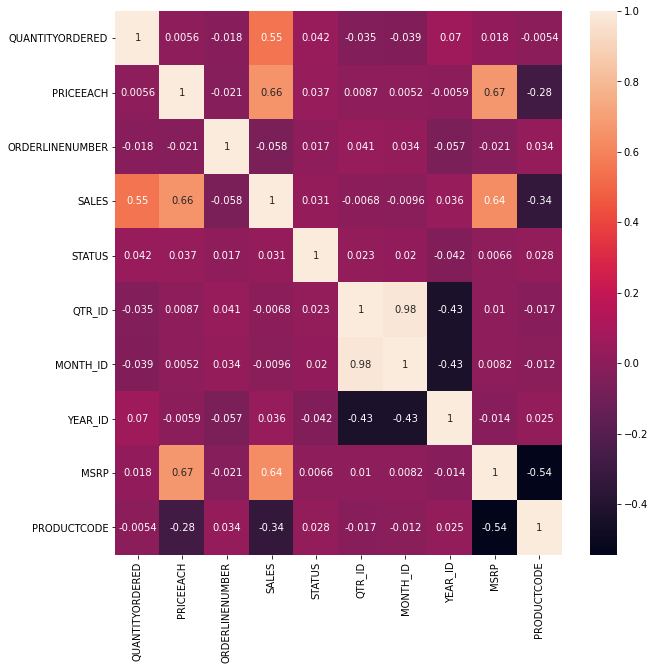

In [20]:
plt.figure(figsize = (10, 10))
corr_matrix = df.iloc[:, :10].corr()
sns.heatmap(corr_matrix, annot=True)

OBESRVATIONS

>High co-relation in Quarter ID and the monthly IDs<br>
>SRP is +vely correlated to PRICEEACH and SALES<br>
>RODUCTCODE is -vely correlated with MSRP, PRICEEACH and Sales<br>
>+ve correlation btw SALES, PRICEEACH, QUANTITYORDERED<br>

In [21]:
df.drop("QTR_ID", axis = 1, inplace = True)
df.shape

(2823, 38)

In [22]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

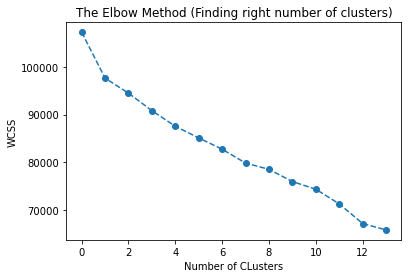

In [23]:
wcss = [] # Within Cluster Sum of Squares
for i in range(1,15):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_) # intertia is the Sum of squared distances of samples to their closest cluster center (WCSS)

plt.plot(wcss, marker='o', linestyle='--')
plt.title('The Elbow Method (Finding right number of clusters)')
plt.xlabel('Number of CLusters')
plt.ylabel('WCSS')
plt.show()

From this we can observe that, 5th cluster seems to be forming the elbow of the curve.

In [24]:
kmeans = KMeans(n_clusters=5, init='k-means++')
kmeans.fit(df_scaled)
labels = kmeans.labels_
labels

array([0, 0, 1, ..., 1, 0, 1])

In [25]:
cluster_centers = pd.DataFrame(data= kmeans.cluster_centers_, columns= df.columns)
cluster_centers

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,PRODUCTLINE_Classic Cars,...,COUNTRY_Italy,COUNTRY_Japan,COUNTRY_Norway,COUNTRY_Philippines,COUNTRY_Singapore,COUNTRY_Spain,COUNTRY_Sweden,COUNTRY_Switzerland,COUNTRY_UK,COUNTRY_USA
0,-0.457248,-0.754965,0.038945,-0.818760,-0.020191,0.005155,-0.014418,-0.634993,0.347062,-0.201827,...,0.068695,0.042678,0.000519,0.002940,0.023887,0.025358,-0.008598,-0.072255,0.038745,0.023073
1,0.421592,0.517170,-0.009282,0.391356,0.039950,-0.008409,0.014076,0.107852,0.073861,-0.721812,...,0.027097,0.003507,-0.014056,-0.043677,0.013596,0.045579,0.053440,-0.105371,0.008577,0.106852
2,1.245428,0.800220,-0.259579,2.573861,0.102212,-0.088008,0.136857,1.430265,-0.871802,0.580097,...,0.023250,0.005118,0.010166,-0.029737,-0.015199,-0.039435,-0.052984,-0.105371,-0.116045,0.108611
3,0.057256,0.646320,0.007343,0.500742,0.022953,0.002831,-0.029587,0.819901,-0.560677,1.377524,...,-0.127917,-0.053584,0.075375,0.099256,-0.011012,0.012522,0.002627,0.378893,0.014526,0.006744
4,-0.173920,-0.039573,-0.005290,-0.189818,-0.205876,0.073057,-0.000691,-0.072337,-0.135140,-0.118060,...,-0.204199,-0.136988,-0.176195,-0.096414,-0.169676,-0.371278,-0.143553,-0.105371,-0.231843,-0.742934
